# Localizar conectores claves

consiste en una lista de ususarios que cada esta identificado con un id y su name.

In [1]:
users= [
{ "id": 0, "name": "Hero" },
{ "id": 1, "name": "Dunn" },
{ "id": 2, "name": "Sue" },
{ "id": 3, "name": "Chi" },
{ "id": 4, "name": "Thor" },
{ "id": 5, "name": "Clive" },
{ "id": 6, "name": "Hicks" },
{ "id": 7, "name": "Devin" },
{ "id": 8, "name": "Kate" },
{ "id": 9, "name": "Klein" }
]

cada uno tiene una red de contactos represetnado como una lista de pares de identificadores

In [2]:
friendship_pairs = [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 4), (4, 5), (5, 6), (5, 7), (6, 8), (7, 8), (8, 9)]

In [3]:
#inicializar el dict con una lista vacia para cada id de usuarios
friendships={user["id"]: [] for user in users}
print(friendships)

{0: [], 1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: [], 8: [], 9: []}


In [4]:
#Y pasar por todos los pares de amistad para llenarlo
for i,j in friendship_pairs:
    friendships[i].append(j) #agregar j como un amigo del usuario i 
    friendships[j].append(i) #agregar i como un amigo del usuario j 
print(friendships)

{0: [1, 2], 1: [0, 2, 3], 2: [0, 1, 3], 3: [1, 2, 4], 4: [3, 5], 5: [4, 6, 7], 6: [5, 8], 7: [5, 8], 8: [6, 7, 9], 9: [8]}


Una vez desarrollada todas las amistades que exsiten, se identificar el numero medio de conexiones. 

In [5]:
def number_of_friends(user):
    #Cuantos amigos por usuarios hay?
    user_id=user["id"]
    friend_ids=friendships[user_id]
    return len(friend_ids)

total_conections=sum(number_of_friends(user) for user in users)
print(f"Se entrega el numero total de conecciones que es {total_conections}")

Se entrega el numero total de conecciones que es 24


y para conocer el nunero medio de conexiones lo dividimos por el numero de usuarios

In [6]:
def median_conections(self):
    num_users=len(users) #longitud de la lista de ususarios
    avg_connections=total_conections / num_users
    return f"El numero totoal medio de conexiones es {avg_connections}"

median_conections(users)

'El numero totoal medio de conexiones es 2.4'

Identificar las personas mas conectadas

In [7]:
#Crea una lista (user_id, number_of_firneds)
number_friends_by_id=[(user["id"], number_of_friends(user)) for user in users]
print(number_friends_by_id)
number_friends_by_id.sort(                             #ordena la lista
    key=lambda id_and_friends: id_and_friends[1],   #por num_friends
    reverse=True                                    #del mayor a menor
)
print("Cada para es (user_id, num_friends)")
print(number_friends_by_id)

[(0, 2), (1, 3), (2, 3), (3, 3), (4, 2), (5, 3), (6, 2), (7, 2), (8, 3), (9, 1)]
Cada para es (user_id, num_friends)
[(1, 3), (2, 3), (3, 3), (5, 3), (8, 3), (0, 2), (4, 2), (6, 2), (7, 2), (9, 1)]


con esto se puede saber cuales son las personas centrales para la red calculando la metrica de la centralidad de grado de la red. 

# Cientificos de datos que podria conocer

se solicita desarrollar un sugeridor "cientificos de datos que podria conocer"
Lo primero que se ocurre es sugerir que los usuarios podrian conocer a los amigos de sus amigos. el codigo para vrias vaces por sus amigos y recoge los amigos de los amigos

In [8]:
def foaf_ids_bad(user):
    return[foaf_id
    for friend_id in friendships[user["id"]]
        for foaf_id in friendships[friend_id]]
for i in range(len(friendships)):
    print(f"Los amigos de los amigos de {users[i]['name']} son: {foaf_ids_bad(users[i])}")


Los amigos de los amigos de Hero son: [0, 2, 3, 0, 1, 3]
Los amigos de los amigos de Dunn son: [1, 2, 0, 1, 3, 1, 2, 4]
Los amigos de los amigos de Sue son: [1, 2, 0, 2, 3, 1, 2, 4]
Los amigos de los amigos de Chi son: [0, 2, 3, 0, 1, 3, 3, 5]
Los amigos de los amigos de Thor son: [1, 2, 4, 4, 6, 7]
Los amigos de los amigos de Clive son: [3, 5, 5, 8, 5, 8]
Los amigos de los amigos de Hicks son: [4, 6, 7, 6, 7, 9]
Los amigos de los amigos de Devin son: [4, 6, 7, 6, 7, 9]
Los amigos de los amigos de Kate son: [5, 8, 5, 8, 8]
Los amigos de los amigos de Klein son: [6, 7, 9]


Identificar un contador de amigos mutuos. Exlucir genete ya conocido por el usuario.    


In [17]:
from collections import Counter
def friends_of_friends(user):
    user_id=user["id"]
    return Counter(
        foaf_id
        for friend_id in friendships[user_id]       #Para cda uno de mis amigos
        for foaf_id in friendships[friend_id]       #encuentra sus amigos
        if foaf_id!= user_id                        #que no son yo 
        and foaf_id not in friendships[user_id]     #y no son mis amigos
    )
print(friends_of_friends(users[3]))

Counter({0: 2, 5: 1})


Lista de pares `(user_id,interest)` 

In [18]:
interests = [
(0, "Hadoop"), (0, "Big Data"), (0, "HBase"), (0, "Java"),
(0, "Spark"), (0, "Storm"), (0, "Cassandra"),
(1, "NoSQL"), (1, "MongoDB"), (1, "Cassandra"), (1, "HBase"),
(1, "Postgres"), (2, "Python"), (2, "scikit-learn"), (2, "scipy"),
(2, "numpy"), (2, "statsmodels"), (2, "pandas"), (3, "R"), (3, "Python"),
(3, "statistics"), (3, "regression"), (3, "probability"),
(4, "machine learning"), (4, "regression"), (4, "decision trees"),
(4, "libsvm"), (5, "Python"), (5, "R"), (5, "Java"), (5, "C++"),
(5, "Haskell"), (5, "programming languages"), (6, "statistics"),
(6, "probability"), (6, "mathematics"), (6, "theory"),
(7, "machine learning"), (7, "scikit-learn"), (7, "Mahout"),
(7, "neural networks"), (8, "neural networks"), (8, "deep learning"),
(8, "Big Data"), (8, "artificial intelligence"), (9, "Hadoop"),
(9, "Java"), (9, "MapReduce"), (9, "Big Data") 
]

Identificar usuarios que tengan el mismo interes

In [19]:
def data_scientists_who_like(target_interest):
    return [
        user_id
        for user_id, user_interest in interests
        if user_interest == target_interest
    ]

Es fácil crear una función que encuentre usuarios con un determinado interés. 
Esto funciona, pero debe examinar toda la lista de intereses para cada búsqueda. Si tenemos muchos usuarios e intereses (o si simplemente queremos hacer muchas búsquedas), probablemente sea mejor crear un índice que vaya desde los intereses hasta los usuarios:

In [20]:
from collections import defaultdict
# Las claves son intereses, los valores son listas de user_ids con ese interes
user_ids_by_interests = defaultdict(list)

for user_id, interest in interests:
    user_ids_by_interests[interest].append(user_id)

Y otro de suarios a intereses: 

In [22]:
interests_by_user_id = defaultdict(list)
for user_id, interest in interests:
    interests_by_user_id[user_id].append(interest)

In [24]:
def most_common_interests_with(user):
    return Counter(
        interested_user_id
        for interest in interests_by_user_id[user["id"]]
        for interested_user_id in user_ids_by_interests[interest]
        if interested_user_id != user["id"]
    )

# Salarios y Experiencia

In [1]:
from matplotlib import pyplot as plt

salaries_and_tenures = [(83000, 8.7), (88000, 8.1),
                        (48000, 0.7), (76000, 6),
                        (69000, 6.5), (76000, 7.5),
                        (60000, 2.5), (83000, 10),
                        (48000, 1.9), (63000, 4.2)]

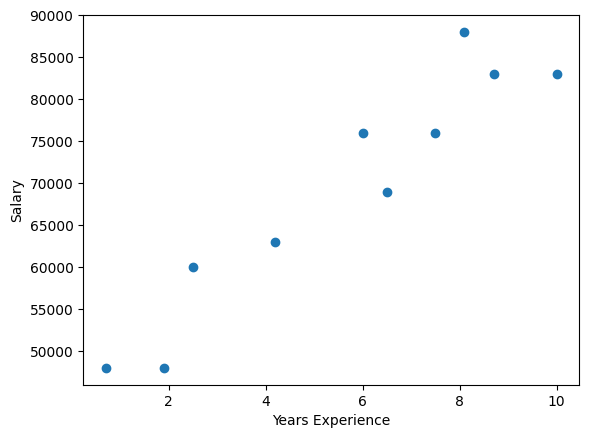

In [4]:
def make_chart_salaries_by_tenure():
    tenures = [tenure for salary, tenure in salaries_and_tenures]
    salaries = [salary for salary, tenure in salaries_and_tenures]
    plt.scatter(tenures, salaries)
    plt.xlabel("Years Experience")
    plt.ylabel("Salary")
    plt.show()
make_chart_salaries_by_tenure()

Identificar el salario medio por antiguedad

In [11]:
from collections import defaultdict
#Las claves son anhos, los valores son listas de los salarios por antiguedad
salary_by_tenure = defaultdict(list)

for salary, tenure in salaries_and_tenures:
    salary_by_tenure[tenure].append(salary)

#Las claves son anhos , cada valor es el slsario medio para dicha antiguedad
average_salary_by_tenure = {
    tenure: sum(salaries) / len(salaries)
    for tenure, salaries in salary_by_tenure.items()
}
print("Solo informa los salarios individulaes de los usuarios: ")
average_salary_by_tenure


Solo informa los salarios individulaes de los usuarios: 


{8.7: 83000.0,
 8.1: 88000.0,
 0.7: 48000.0,
 6: 76000.0,
 6.5: 69000.0,
 7.5: 76000.0,
 2.5: 60000.0,
 10: 83000.0,
 1.9: 48000.0,
 4.2: 63000.0}

Podria ser mas util poner los anhos de antiguedad en un bucket

In [14]:
def tenure_bucket(tenure):
    if tenure < 2:
        return "less than 2 years"
    elif tenure < 5:
        return "2 to 4 years"
    else:
        return "5 or more years"

Entonces podemos agrupar los salarios correspondientes a cada bucket:

In [15]:
salary_by_tenure_bucket = defaultdict(list)

for salary, tenure in salaries_and_tenures:
    bucket = tenure_bucket(tenure)
    salary_by_tenure_bucket[bucket].append(salary)

In [17]:
#Las claves son buckets de anhos de antiguedad, los valores son listas de salarios para bucket
average_salary_by_bucket = {
  tenure_bucket : sum(salaries) / len(salaries)
  for tenure_bucket, salaries in salary_by_tenure_bucket.items()
}
average_salary_by_bucket

{'5 or more years': 79166.66666666667,
 'less than 2 years': 48000.0,
 '2 to 4 years': 61500.0}

Los cientificos de datos con mas de cinco anhos de expeirencia ganan un 65% mas que los cientificos de datos con poca experiencia o ninguna

# Cuentas de pago

In [18]:
def predict_paid_or_unpaid(years_experience):
  if years_experience < 3.0: return "paid"
  elif years_experience < 8.5: return "unpaid"
  else: return "paid"

In [20]:
predict_paid_or_unpaid(1.9)


'paid'